In [2]:
import folium
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd

# Load the squirrel data
data = pd.read_csv("../data/squirrel_data.csv")

# Filter for required columns
data = data[['X', 'Y']]

# Function to snap to grid
GRID_SIZE = 0.0005  # e.g., ~50 meters depending on location

def snap_to_grid(coordinate):
    """Snap a latitude or longitude to the nearest grid coordinate"""
    return round(coordinate / GRID_SIZE) * GRID_SIZE

# Snap squirrel data to grid
data['GRID_LAT'] = data['Y'].apply(snap_to_grid)
data['GRID_LONG'] = data['X'].apply(snap_to_grid)

# Group by grid location
grouped_squirrels = data.groupby(['GRID_LAT', 'GRID_LONG']).size().reset_index(name='counts')

# Create the map focused on Central Park
m = folium.Map(location=[data['GRID_LAT'].mean(), data['GRID_LONG'].mean()], zoom_start=15, tiles='CartoDB Positron')

# Calculate max count for scaling purposes
max_count = grouped_squirrels['counts'].max()

# Adding circles to the map
for idx, row in grouped_squirrels.iterrows():
    # Scale the radius according to count
    radius = (row['counts'] / max_count) * 20  # This scales the highest count to a radius of 20; adjust as necessary
    
    folium.CircleMarker(
        location=(row['GRID_LAT'], row['GRID_LONG']),
        radius=radius,
        fill=True,
        fill_opacity=0.7,
        color='gray',
        fill_color='gray'
    ).add_to(m)

# Display the map
m

# Save the map to an HTML file if needed
m.save('squirrel_data.html')

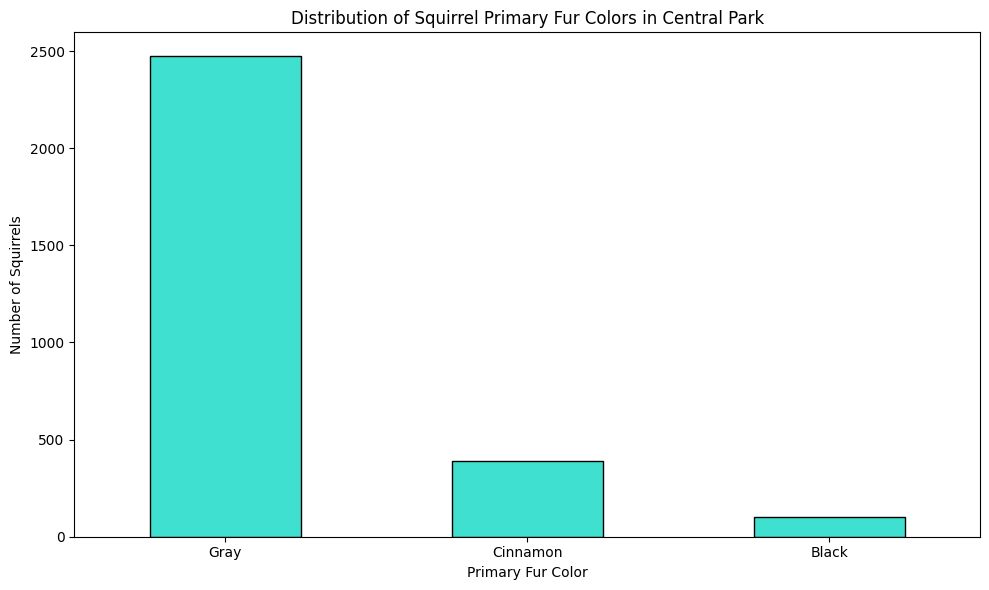

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the squirrel data
data = pd.read_csv("../data/squirrel_data.csv")

# Drop NaN values and count the unique values of 'Primary Fur Color'
color_counts = data['Primary Fur Color'].dropna().value_counts()

# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='turquoise', edgecolor='black')

# Titles and labels
plt.title("Distribution of Squirrel Primary Fur Colors in Central Park")
plt.ylabel("Number of Squirrels")
plt.xlabel("Primary Fur Color")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


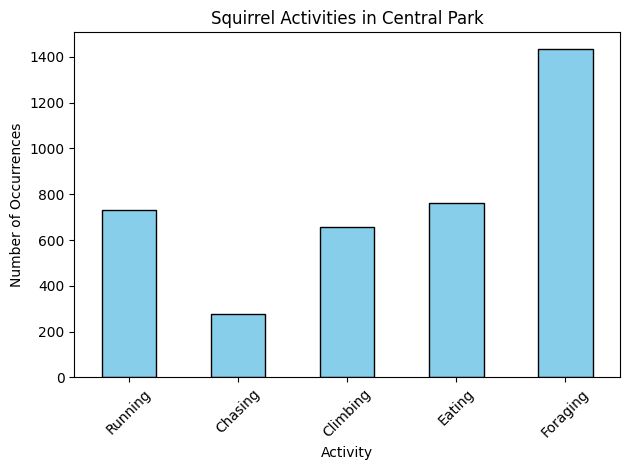

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv("../data/squirrel_data.csv")

# List of activities to analyze
activities = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']

# Group by each activity and count True occurrences
activity_counts = data[activities].sum()

# Create bar diagram
activity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Squirrel Activities in Central Park")
plt.ylabel("Number of Occurrences")
plt.xlabel("Activity")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

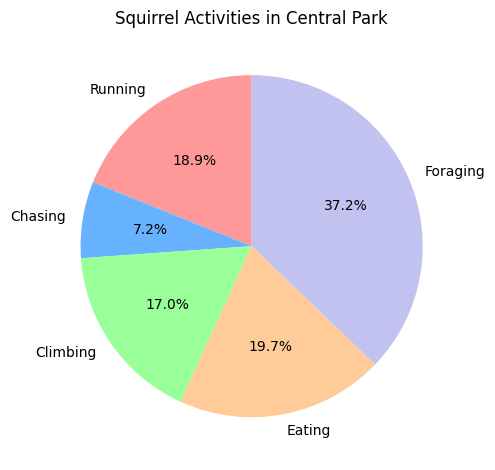

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv("../data/squirrel_data.csv")

# List of activities to analyze
activities = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']

# Group by each activity and count True occurrences
activity_counts = data[activities].sum()

# Create pie chart
fig, ax = plt.subplots()
activity_counts.plot(kind='pie', ax=ax, labels=activity_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0'])
ax.set_ylabel('')  # Removes the default 'None' ylabel
plt.title("Squirrel Activities in Central Park")
plt.tight_layout()

# Display the plot
plt.show()